<h1>Monte Carlo Options Pricing</h1>

In this python notebook, we will be pricing exotic options by using Monte-Carlo simulation. The asset will first be modelled by a stochastic process, then a Monte-Carlos simulation will be run to simulate the asset's price dynamics, and finally the fair value will be computed.

<h2> 1.0 Importing necessary packages </h2>

Packages:

- MC: For running Monte-Carlo simulation
- optionsMC: For simulating different type of options conditions, payoffs
- stochastic_process_simulation: For modelling asset price dynamics

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from MC.monte_carlo import *
from MC.options_MC import *
from MC.stochastic_process_simulation import *

<h2> 2.0 Simulating Asset Price Dynamics </h2>

The code chunk below will be responsible for modelling the stock price dynamics. I have chosen to use a Heston model with a Merton jump.

The code chunk below wil be setting the parameters for the asset's price dynamics

In [2]:
# Simulating Parameters:
tau = 6/12
n_steps = 1_000

# Stock price parameters
initial_price = 110
mu_price      = 0.01
k_price       = 0.01
theta_price   = 0.03
sigma_price   = 0.2

# Stochastic volatility parameters
initial_volatility = 0.02
k_volatility       = 0.001
theta_volatility   = 0.002
mu_volatility      = 0.05
sigma_volatility   = 0.01

# Jump parameters
lambda_jump = 10
mu_jump     = 0.02
sigma_jump  = 0.02

Initialising model, uncomment the specific model you would like to try. In this case, the stochastic volatility has been modelled with CIR, and the asset's pricing model is done with Heston's model (StochasticVolatility)

In [3]:
# Modelling the stochastic volatility
sigma_stochastic_volatility = CIRProcess(initial_volatility, k_volatility, theta_volatility, mu_volatility, 
                                   sigma_volatility, tau, n_steps = n_steps)

# Modelling the Heston model
stoch_process = StochasticVolatility(initial_price, initial_volatility, mu_price, sigma_stochastic_volatility, tau, n_steps =  n_steps)

# # GBM Model:
# stoch_process = StochasticProcessSimulation(initial_price, mu_price, sigma_price, tau, n_steps)

# # Vasicek Model:
# stoch_process = VasicekProcess(initial_price, k, theta, mu_price, sigma, tau, n_steps)

# # CIR Model:
# stoch_process = CIRProcess(initial_price, k, theta, mu_price, sigma, tau, n_steps)

We will now model Merton's Jump process and combine it with the existing asset price model to create a heston model with Jump.

In [4]:
Modelling Merton's Jump
jump_process = Jump(lambda_jump, mu_jump, sigma_jump, tau/n_steps)

Combining the stochastic process with jump process
stock_process = StochasticJumpProcess(stoch_process, jump_process, initial_price, n_steps)



SyntaxError: invalid syntax (3503002125.py, line 1)

<h2> 3.0 Simulation </h3>

Below is a code chunk which runs a quick simulation of what the price dynamics is like

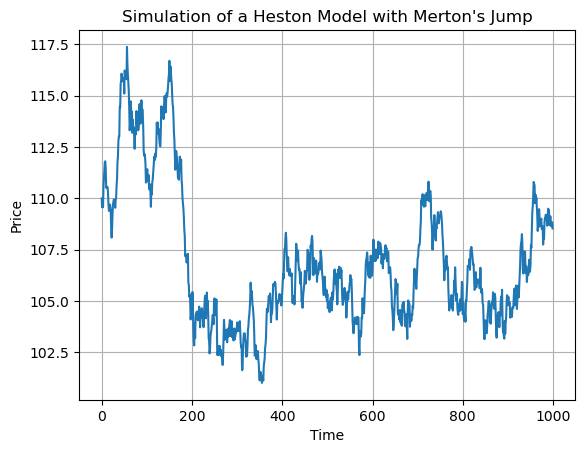

In [ ]:
# Simulating model
stock_process.simulate()

# Retreiving simulatioon results
simulation = stock_process.get_simulation()

# Plotting results
plt.plot(simulation)
plt.ylabel('Price')
plt.xlabel('Time')
plt.title("Simulation of a Heston Model with Merton's Jump")
plt.grid()

<h2> 4.0 Initialising Options </h2>
Now that we have modelled the asset's price dynamics, the Option value will be calculated by running a Monte Carlo simulation of the asset's price, computing the payoff of each scenario, and finally computing the net-present value of the payoff.


In [ ]:
# Initialising options parameter
strike_price  = 100
tau           = 6/12
rate          = 0.02
call_put      = 'call'


# Initialising options object
european_option = Option(stock_process, strike_price, rate, tau, call_put = call_put)
asian_option    = AsianOption(stock_process, strike_price, rate, tau, call_put = call_put, average_type = 'arithmetic', float_fixed = 'floating')
lookback_option = LookbackOption(stock_process, strike_price, rate, tau, call_put = call_put)
up_out_option = BarrierOption(stock_process, strike_price, rate, tau, barrier = 118, knock = 'up-out', call_put = call_put)

In [ ]:
european_option_mc = MonteCarlo(european_option)
european_option_mc.simulate()

asian_option_mc = MonteCarlo(asian_option)
asian_option_mc.simulate()

lookback_option_mc = MonteCarlo(lookback_option)
lookback_option_mc.simulate()

up_out_option_mc = MonteCarlo(up_out_option)
up_out_option_mc.simulate()

print(f'European option {call_put} Monte Carlo fair value: {european_option_mc.get_fair_value()}')
print(f'Asian option {call_put} Monte Carlo fair value: {asian_option_mc.get_fair_value()}')
print(f'Lookback option {call_put} Monte Carlo fair value: {lookback_option_mc.get_fair_value()}')
print(f'knock-in option {call_put} Monte Carlo fair value: {up_out_option_mc.get_fair_value()}')

knock-in option call Monte Carlo fair value: 1.1377196197888848
